## 다차원척도법(Multidimensional Scaling, MDS)
-  데이터 포인트 간의 거리 행렬을 입력으로 받아 고차원 데이터를 저차원(보통 2차원 또는 3차원)으로 축소하는 기법입니다. 이를 통해 데이터의 패턴이나 구조를 시각적으로 쉽게 파악할 수 있습니다.

- MDS는 수치 데이터와 비수치 데이터 모두에 적용할 수 있습니다. 각각의 예제를 통해 시각화를 보여드리겠습니다.

### **1. 수치 데이터 예제**
수치 데이터 예제로는 다음과 같은 아이리스(iris) 데이터셋을 사용할 수 있습니다. 이는 꽃의 특징에 대한 측정값을 포함합니다.

<img src='https://blog.kakaocdn.net/dn/t98JC/btsa6CuL7nS/O7D3FF4VGXRKLl7VjNhRMK/img.png'>

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


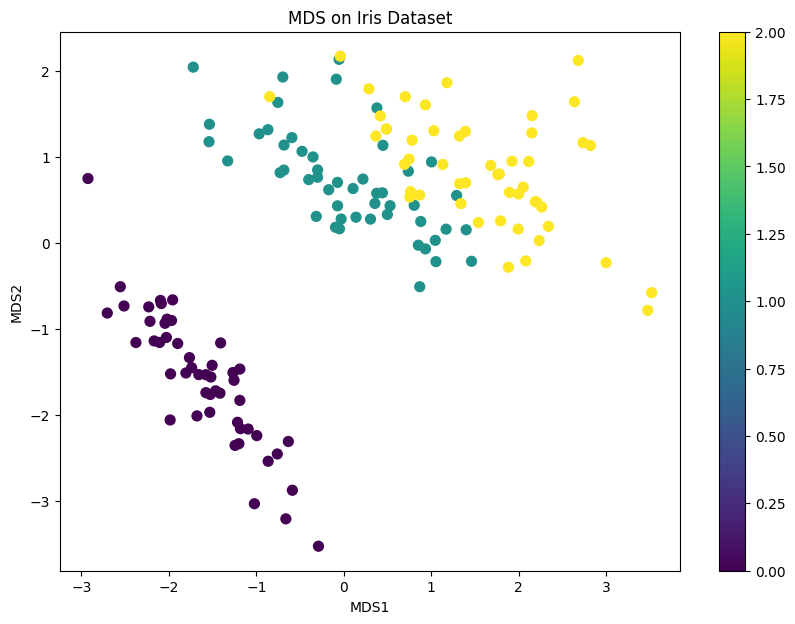

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler

# 아이리스 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# MDS 적용
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)

# 시각화
plt.figure(figsize=(10, 7))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y, cmap='viridis', s=50)
plt.colorbar()
plt.title('MDS on Iris Dataset')
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.show()


## **2. 비수치 데이터**
세계 주요 도시 30군데의 위도와 경도를 이용하여 MDS를 수행하고 시각화해보겠습니다. 먼저 도시의 위도와 경도 데이터를 수집한 후, 그 거리를 계산하여 MDS를 적용

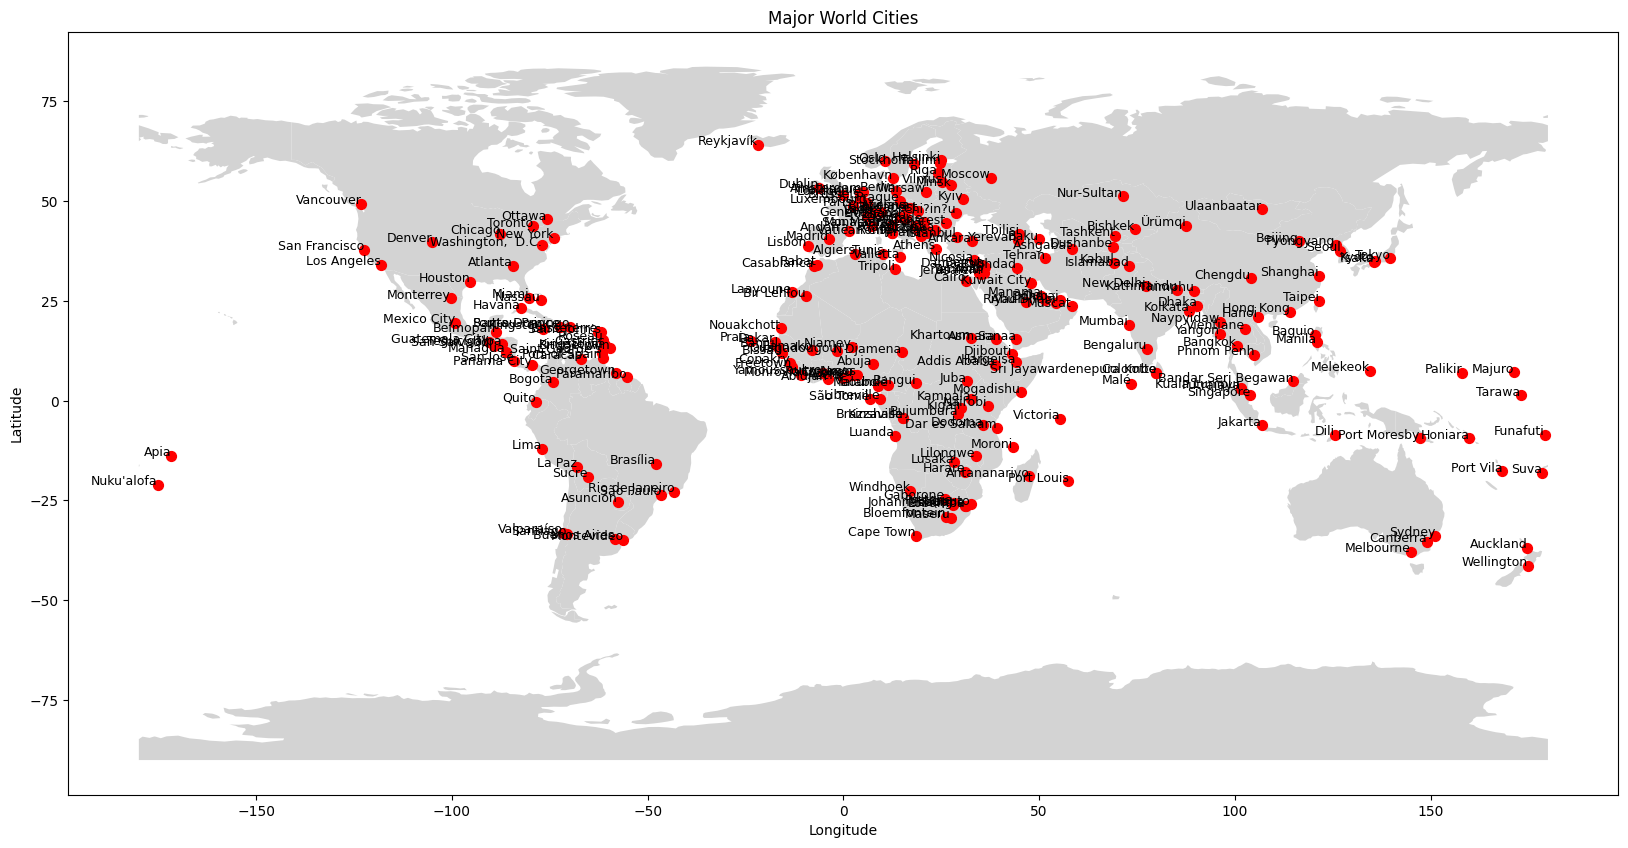

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 주요 도시 데이터 로드
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# 세계 지도 데이터 로드
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 지도 그리기
fig, ax = plt.subplots(figsize=(20, 15))
world.plot(ax=ax, color='lightgray')
cities.plot(ax=ax, color='red', markersize=50)

# 도시 이름 표시
for x, y, label in zip(cities.geometry.x, cities.geometry.y, cities['name']):
    ax.text(x, y, label, fontsize=9, ha='right')

plt.title('Major World Cities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


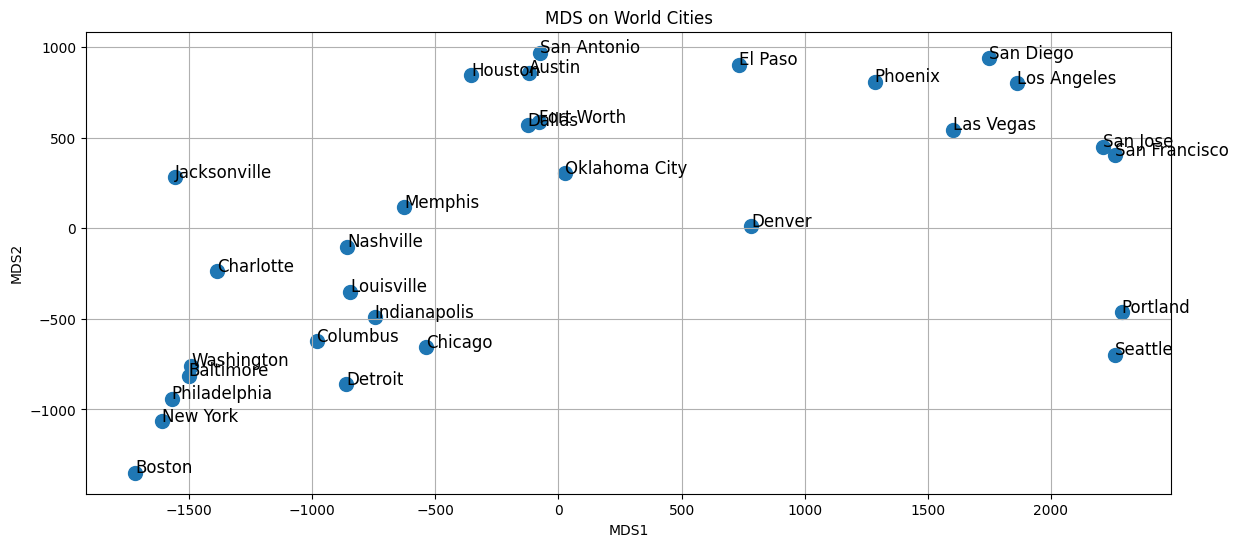

In [ ]:
import numpy as np
import pandas as pd
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# 주요 도시의 위도와 경도 데이터
cities = ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix", "Philadelphia", "San Antonio", "San Diego",
          "Dallas", "San Jose", "Austin", "Jacksonville", "Fort Worth", "Columbus", "Indianapolis", "Charlotte",
          "San Francisco", "Seattle", "Denver", "Washington", "Boston", "El Paso", "Nashville", "Detroit", "Oklahoma City",
          "Portland", "Las Vegas", "Memphis", "Louisville", "Baltimore"]

latitudes = [40.7128, 34.0522, 41.8781, 29.7604, 33.4484, 39.9526, 29.4241, 32.7157,
             32.7767, 37.3382, 30.2672, 30.3322, 32.7555, 39.9612, 39.7684, 35.2271,
             37.7749, 47.6062, 39.7392, 38.9072, 42.3601, 31.7619, 36.1627, 42.3314, 35.4676,
             45.5152, 36.1699, 35.1495, 38.2527, 39.2904]

longitudes = [-74.0060, -118.2437, -87.6298, -95.3698, -112.0740, -75.1652, -98.4936, -117.1611,
              -96.7970, -121.8863, -97.7431, -81.6557, -97.3308, -82.9988, -86.1581, -80.8431,
              -122.4194, -122.3321, -104.9903, -77.0369, -71.0589, -106.4850, -86.7816, -83.0458, -97.5164,
              -122.6784, -115.1398, -90.0489, -85.7585, -76.6122]

# 도시 간의 거리 행렬 계산
num_cities = len(cities)
distance_matrix = np.zeros((num_cities, num_cities))

for i in range(num_cities):
    for j in range(num_cities):
        if i != j:
            coord1 = (latitudes[i], longitudes[i])
            coord2 = (latitudes[j], longitudes[j])
            distance_matrix[i, j] = geodesic(coord1, coord2).kilometers

# MDS 적용
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
cities_mds = mds.fit_transform(distance_matrix)

# 시각화
plt.figure(figsize=(14, 6))
plt.scatter(cities_mds[:, 0], cities_mds[:, 1], s=100)

for i, city in enumerate(cities):
    plt.text(cities_mds[i, 0], cities_mds[i, 1], city, fontsize=12)

plt.title('MDS on World Cities')
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.grid(True)
plt.show()


## **기업의 brand image**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


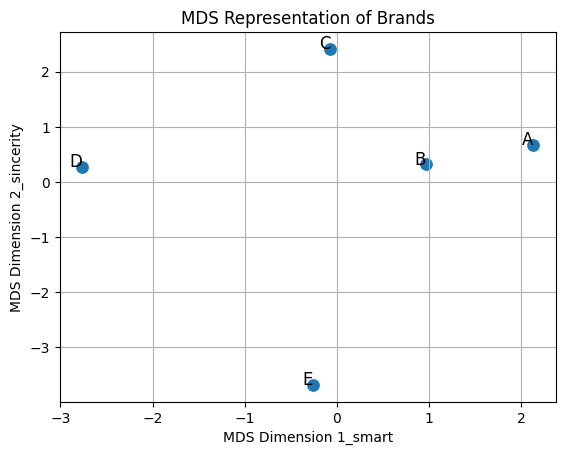

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import seaborn as sns

# 1. 가상의 브랜드 유사성/비유사성 행렬 생성
# 예시: 5개의 브랜드 (A, B, C, D, E)
brands = ['A', 'B', 'C', 'D', 'E']
similarity_matrix = np.array([
    [0, 2, 3, 4, 5],
    [2, 0, 3, 4, 5],
    [3, 3, 0, 4, 5],
    [4, 4, 4, 0, 5],
    [5, 5, 5, 5, 0]
])

# 2. MDS 적용
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
pos = mds.fit_transform(similarity_matrix)

# 결과를 데이터프레임으로 변환
df = pd.DataFrame(pos, columns=['x', 'y'])
df['brand'] = brands

# 3. 시각화
sns.scatterplot(x='x', y='y', data=df, s=100)

# 각 포인트에 브랜드 이름 라벨 추가
for i in range(len(df)):
    plt.text(df['x'][i], df['y'][i], df['brand'][i], fontsize=12, ha='right')

plt.title('MDS Representation of Brands')
plt.xlabel('MDS Dimension 1_smart')
plt.ylabel('MDS Dimension 2_sincerity')
plt.grid(True)
plt.show()


## **[In-Depth: Manifold Learning](https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html)**

In [ ]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)

    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

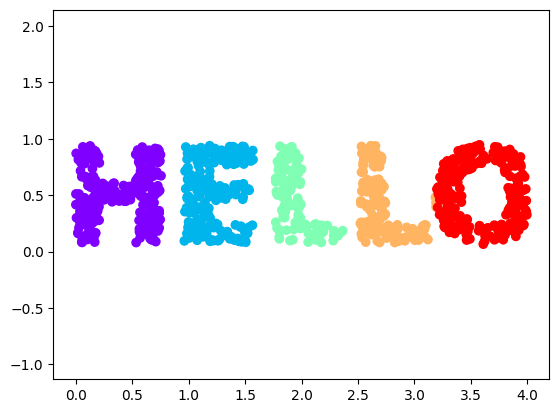

In [ ]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

Multidimensional Scaling (MDS)
Looking at data like this, we can see that the particular choice of x and y values of the dataset are not the most fundamental description of the data: we can scale, shrink, or rotate the data, and the "HELLO" will still be apparent. For example, if we use a rotation matrix to rotate the data, the x and y values change, but the data is still fundamentally the same:

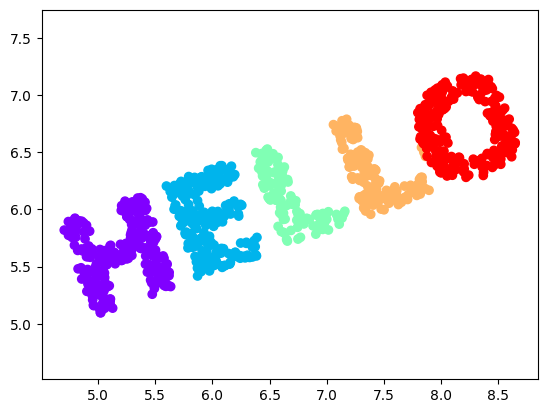

In [ ]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

This tells us that **the x and y values are not necessarily fundamental to the relationships in the data. What is fundamental, in this case, is the distance between each point and the other points in the dataset.** A common way to represent this is to use a distance matrix: for $N$ points, we construct an $N \times N$ array such that entry $(i, j)$ contains the distance between point $i$ and point $j$. Let's use Scikit-Learn's efficient pairwise_distances function to do this for our original data:

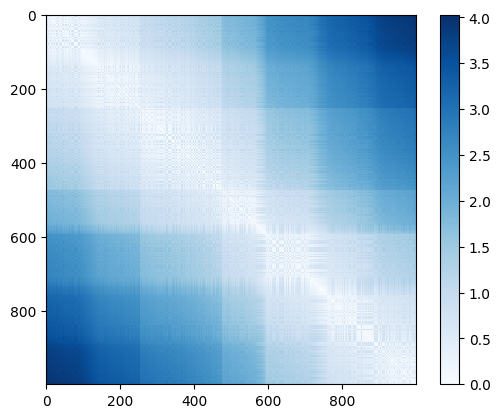

In [ ]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

In [ ]:
X[:1]

array([[4.65390215e-05, 4.16565828e-01]])

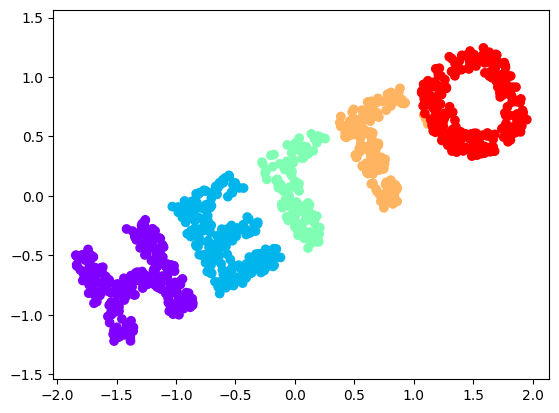

In [ ]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

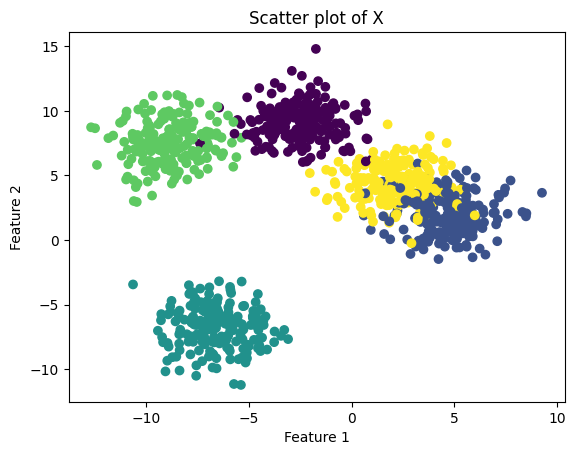

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
import pandas as pd

# 5개 군집을 가진 데이터 생성
n_samples = 1000
n_clusters = 5
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, random_state=42, cluster_std=1.5)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of X')
plt.show()


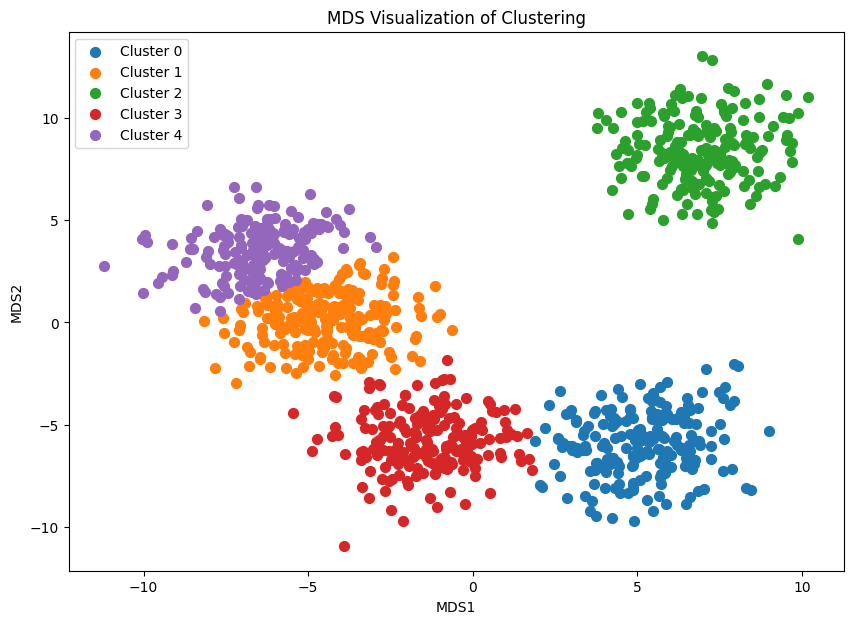

In [ ]:
# MDS로 차원 축소
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X)

# 데이터프레임 생성
df = pd.DataFrame(X_mds, columns=['MDS1', 'MDS2'])
df['Cluster'] = labels

# 시각화
plt.figure(figsize=(10, 7))
for cluster in range(n_clusters):
    subset = df[df['Cluster'] == cluster]
    plt.scatter(subset['MDS1'], subset['MDS2'], s=50, label=f'Cluster {cluster}')

plt.legend()
plt.title('MDS Visualization of Clustering')
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.show()
